In [1]:
#import packages and clean data before running the principal component analysis
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

df = pd.read_csv (r'C:\Users\fahim\Documents\0_WGUDocuments\d208\1medical_clean.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [2]:
#check if there are any missing data entries - if there are none then the output should be False
df.isna().any()

CaseOrder             False
Customer_id           False
Interaction           False
UID                   False
City                  False
State                 False
County                False
Zip                   False
Lat                   False
Lng                   False
Population            False
Area                  False
TimeZone              False
Job                   False
Children              False
Age                   False
Income                False
Marital               False
Gender                False
ReAdmis               False
VitD_levels           False
Doc_visits            False
Full_meals_eaten      False
vitD_supp             False
Soft_drink            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis   

In [3]:
#identify the continuous variables
df.dtypes

CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain  

In [4]:
#identify the continuous variables
cont = df.select_dtypes("number")
cont.head()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,35621,34.34960,-86.72508,2951,1,53,86575.93,19.141466,6,0,0,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,32446,30.84513,-85.22907,11303,3,51,46805.99,18.940352,4,2,1,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,57110,43.54321,-96.63772,17125,3,53,14370.14,18.057507,4,1,0,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,56072,43.89744,-93.51479,2162,0,78,39741.49,16.576858,4,1,0,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,23181,37.59894,-76.88958,5287,1,22,1209.56,17.439069,5,0,2,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
#create a X dataframe with all of the chosen continuous variables for PCA
X = df[["Age", "Income", "VitD_levels", "Initial_days", "TotalCharge","Additional_charges"]].copy()
#create the list of column headers
X_cols = list(X.columns)
#set y to ReAdmis as that is our target variable we want to predict
y = df["ReAdmis"]

In [6]:
#perform the standardize of all of the continuous variables selected for our PCA
X_std = StandardScaler().fit_transform(df[["Age", "Income", "VitD_levels", "Initial_days", "TotalCharge","Additional_charges"]].copy())
#verify that everything has been standardized to mean of 0, and a standard deviation of 1
print(f"Verifying means and standard deviation of each feature...")
#place the standardized values into a temporary dataframe for verifications
X_std_df = pd.DataFrame(X_std, columns=X_cols)
#print out the mean and the standard deviation for each of the 6 columns that we've standardized
for column in X_cols:
    col_mean = round(X_std_df.loc[:,column].mean(), 4)
    col_std = round(X_std_df.loc[:,column].std(), 4)
    print(f"For column '{column}', the mean is {col_mean} and the standard deviation is {col_std}.")

Verifying means and standard deviation of each feature...
For column 'Age', the mean is 0.0 and the standard deviation is 1.0001.
For column 'Income', the mean is 0.0 and the standard deviation is 1.0001.
For column 'VitD_levels', the mean is -0.0 and the standard deviation is 1.0001.
For column 'Initial_days', the mean is -0.0 and the standard deviation is 1.0001.
For column 'TotalCharge', the mean is 0.0 and the standard deviation is 1.0001.
For column 'Additional_charges', the mean is -0.0 and the standard deviation is 1.0001.


In [7]:
#generate a covariance matrix to check if any of our variables are perfectly correlated
#define the colors red and yellow for the conditional formatting of the covariance matrix visualization
def highlight_cells (val):
    if val > 0.9:
        color = 'red'
    elif val > 0.6:
        color = 'yellow'
    else:
        color = ''
    return f"background: {color}"

#now that the colors have been defined, proceed to generate the covariance matrix
covariance_matrix = pd.DataFrame.cov(X_std_df)
#apply the styling defined above. very closely correllated features will be displayed in red
covariance_matrix.style.applymap(highlight_cells)

,Age,Income,VitD_levels,Initial_days,TotalCharge,Additional_charges
Age,1.000100,-0.012229,0.010316,0.016266,0.016877,0.716925
Income,-0.012229,1.000100,-0.013116,-0.012466,-0.014347,-0.009826
VitD_levels,0.010316,-0.013116,1.000100,-0.003642,-0.001403,0.008291
Initial_days,0.016266,-0.012466,-0.003642,1.000100,0.987739,0.004409
TotalCharge,0.016877,-0.014347,-0.001403,0.987739,1.000100,0.029259
Additional_charges,0.716925,-0.009826,0.008291,0.004409,0.029259,1.000100


In [8]:
#the covariance matrix indicates that Intial_days and TotalCharge are nearly perfectly correlated
print(f"The correlation between Initial_days and TotalCharge is {X_std_df.Initial_days.corr(X_std_df.TotalCharge)}.")
# Due to this redundancy, we will be dropping TotalCharge.

The correlation between Initial_days and TotalCharge is 0.9876402655398171.


In [9]:
#we will now create a new dataframe that does not include TotalCharge before proceeding.
#create X dataframe with all of the continuous variables for PCA, excluding TotalCharge
X = df[["Age", "Income", "VitD_levels", "Initial_days","Additional_charges"]].copy()
#create the list of column headers
X_cols = list(X.columns)
#set y to ReAdmis as that is our target variable we want to predict
y = df["ReAdmis"]

#perform the standardize of all of the continuous variables selected for our PCA
X_std = StandardScaler().fit_transform(df[["Age", "Income", "VitD_levels", "Initial_days","Additional_charges"]].copy())
#verify that everything has been standardized to mean of 0, and a standard deviation of 1
print(f"Verifying means and standard deviation of each feature...")
#place the standardized values into a temporary dataframe for verifications
X_std_df = pd.DataFrame(X_std, columns=X_cols)
#print out the mean and the standard deviation for each of the 5 columns that we've standardized
for column in X_cols:
    col_mean = round(X_std_df.loc[:,column].mean(), 4)
    col_std = round(X_std_df.loc[:,column].std(), 4)
    print(f"For column '{column}', the mean is {col_mean} and the standard deviation is {col_std}.")

Verifying means and standard deviation of each feature...
For column 'Age', the mean is 0.0 and the standard deviation is 1.0001.
For column 'Income', the mean is 0.0 and the standard deviation is 1.0001.
For column 'VitD_levels', the mean is -0.0 and the standard deviation is 1.0001.
For column 'Initial_days', the mean is -0.0 and the standard deviation is 1.0001.
For column 'Additional_charges', the mean is -0.0 and the standard deviation is 1.0001.


In [10]:
#now that we have our final dataframe, save and export this dataframe as a CSV file
X_std_df.to_csv(r'C:\Users\fahim\Documents\0_WGUDocuments\d212\1medical_clean-PREPAREDTASK2.csv', index=False)

In [11]:
# X_std is the arrays created by the StandardScaler for us to perform PCA with
#create the PCA object
pca = PCA(n_components = 5, random_state = 369)
#fit the PCA to the standardized X data, then transform
X_pca = pca.fit_transform(X_std)
#generate the matrix of PCA loadings, demonstrating the weight that a given feature contributes to that Principal Component 
X_pca_loadings = pd.DataFrame(pca.components_.T, 
                              columns = ["PC1", "PC2", "PC3", "PC4", "PC5"], 
                              index = X_cols)
X_pca_loadings

,PC1,PC2,PC3,PC4,PC5
Age,0.706773,0.019316,-0.003262,0.000021,0.707169
Income,-0.022412,0.743184,0.011839,0.668603,0.002134
VitD_levels,0.018623,-0.492164,0.686012,0.535547,-0.002021
Initial_days,0.020650,-0.451832,-0.727455,0.515844,-0.011668
Additional_charges,0.706538,0.030430,0.006818,-0.008006,-0.706942


In [12]:
#the 5 PC's generate the entire variance for this model
print(f"These 5 principal components account for {round(sum(pca.explained_variance_ratio_ * 100), 3)}% of variance.")
#show the individual contribution of each PC to the whole
print(f"The contribution of each principal component to the total is shown here:")
pc_contributions = list(pca.explained_variance_ratio_)
pc_names = list(X_pca_loadings.columns)
for i in range(len(pc_names)):
    print(f"For {pc_names[i]}, the contribution is {round(pc_contributions[i] * 100, 3)}%")

These 5 principal components account for 100.0% of variance.
The contribution of each principal component to the total is shown here:
For PC1, the contribution is 34.355%
For PC2, the contribution is 20.311%
For PC3, the contribution is 20.073%
For PC4, the contribution is 19.6%
For PC5, the contribution is 5.661%


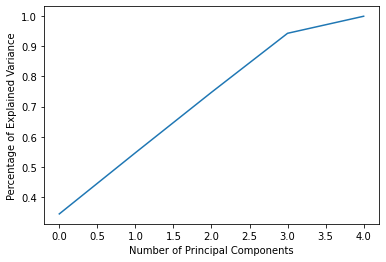

In [13]:
#create a scree plot to help visualize the contribution of each PC to the whole of variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Principal Components")
plt.ylabel("Percentage of Explained Variance")
plt.show();

In [14]:
#since we want 4 components in our PCA from the prior step, we repeat the PCA process to generate a 'final_pca'
final_pca = PCA(n_components = 4, random_state = 369)
#fit the PCA to the standardized X data, then transform
final_pca.fit(X_std)
final_X_pca = final_pca.transform(X_std)
#generate PCA loadings for the final_pca
final_X_pca_loadings = pd.DataFrame(final_pca.components_.T, 
                              columns = ["PC1", "PC2", "PC3", "PC4"], 
                              index = X_cols)
final_X_pca_loadings

,PC1,PC2,PC3,PC4
Age,0.706773,0.019316,-0.003262,0.000021
Income,-0.022412,0.743184,0.011839,0.668603
VitD_levels,0.018623,-0.492164,0.686012,0.535547
Initial_days,0.020650,-0.451832,-0.727455,0.515844
Additional_charges,0.706538,0.030430,0.006818,-0.008006


In [15]:
#before proceeding, show the individual contribution of each PC to the whole
print(f"The amount of variance accounted for by each principal component can be seen here:")
pc_contributions = list(final_pca.explained_variance_ratio_)
pc_names = list(final_X_pca_loadings.columns)
for i in range(len(pc_names)):
    print(f"For {pc_names[i]}, the contribution is {round(pc_contributions[i] * 100, 3)}%")

The amount of variance accounted for by each principal component can be seen here:
For PC1, the contribution is 34.355%
For PC2, the contribution is 20.311%
For PC3, the contribution is 20.073%
For PC4, the contribution is 19.6%


In [16]:
print(f"These final 4 principal components account for {round(sum(final_pca.explained_variance_ratio_ * 100), 3)}% of variance in the data.")

These final 4 principal components account for 94.339% of variance in the data.


In [17]:
#now that PCA finished, we can split the final_X_pca to train and test sets for classification
#split the data into train and test sets, 80% train, 20% test, use stratify to maintain proportions across split
X_train, X_test, y_train, y_test = train_test_split(final_X_pca, y, train_size = 0.8, test_size=0.2, random_state = 369, stratify = y)
#verify that each of the X sets are correctly shaped and to reflect the 4 PC's
print(f"The shape of the X_train set is: {X_train.shape}")
print(f"The shape of the X_test set is: {X_test.shape}")

The shape of the X_train set is: (8000, 4)
The shape of the X_test set is: (2000, 4)


In [18]:
#now that the data has been split accordingly, we can create our classification model
classification_model = DecisionTreeClassifier(random_state=369).fit(X_train, y_train)
y_predictions = classification_model.predict(X_test)
#generate an accuracy report for our model
test_accuracy = accuracy_score(y_test, y_predictions)
print(f'Decision tree accuracy: {test_accuracy}') 
# Predict the test set probabilities of the positive class
y_pred_proba = classification_model.predict_proba(X_test)[:,1]
#create the final confusion matrix
final_matrix = confusion_matrix(y_test, y_predictions)
print("\nThe confusion matrix for this Decision Tree model:")
print("Predicted No Readmission  | Predicted Readmission")
print(f"                    {final_matrix[0]} Actual No Readmission")
print(f"                     {final_matrix[1]} Actual Readmission\n")

Decision tree accuracy: 0.94

The confusion matrix for this Decision Tree model:
Predicted No Readmission  | Predicted Readmission
                    [1205   61] Actual No Readmission
                     [ 59 675] Actual Readmission



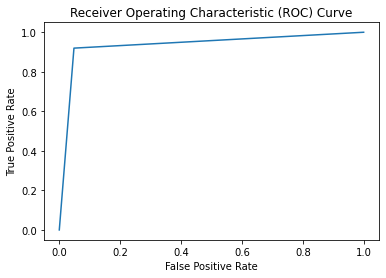

In [19]:
#generate the ROC curve 
y_true = y_test
y_scores = y_pred_proba
fpr, tpr, thresholds = roc_curve(y_true, y_scores, pos_label='Yes')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [20]:
#compute the roc_auc score
roc_auc = roc_auc_score(y_test, y_pred_proba)
#print the roc auc score
print(f'Area Under the Curve (AUC) score: {roc_auc}')

Area Under the Curve (AUC) score: 0.9357176371329813
